In [1]:
from tensorflow.keras.models import load_model

In [25]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
print("Loading the model")
model_cnn = load_model("Crop_CNN.h5")
print("Model Loaded Successfully")

Loading the model
Model Loaded Successfully


In [57]:
def predict_image(image):
    
    classes = ["jute","maize","rice","sugarcane","wheat"]
    
    print("This is your image : \n")
    print("##############################################################################################################")
    plt.imshow(image)
    plt.show()
    print("##############################################################################################################")

    image = cv2.resize(image, (64,64))

    # scale values from range 0-255 to 0-1
    image = image.astype("float") / 255.0

    # Ready the image for input to the network
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # make prediction on the image
    preds = model_cnn.predict(image)[0]
#     result = dict()
#     result[classes[0]] = round(float(list(preds)[0]), 3)
#     result[classes[1]] = round(float(list(preds)[1]), 3)
#     result[classes[2]] = round(float(list(preds)[2]), 3)
#     result[classes[3]] = round(float(list(preds)[3]), 3)
#     result[classes[4]] = round(float(list(preds)[4]), 3)
#     results = pd.DataFrame.from_dict(result)
    result = pd.DataFrame( columns = ["Crops","Confidence"])
    result.loc[len(result.index)] = [classes[0], round(float(list(preds)[0]), 3)]
    result.loc[len(result.index)] = [classes[1], round(float(list(preds)[1]), 3)]
    result.loc[len(result.index)] = [classes[2], round(float(list(preds)[2]), 3)]
    result.loc[len(result.index)] = [classes[3], round(float(list(preds)[3]), 3)]
    result.loc[len(result.index)] = [classes[4], round(float(list(preds)[4]), 3)]

    print("\n Our Prediction is : \n", result[:3])
#     return result

In [34]:
img_path = input("Enter the image path : ")

Enter the image path : download.jfif


In [61]:
cpimage = cv2.imread(img_path)

This is your image : 

##############################################################################################################


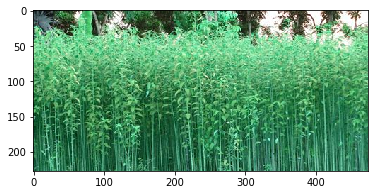

##############################################################################################################

 Our Prediction is : 
    Crops  Confidence
0   jute       0.977
1  maize       0.001
2   rice       0.013


In [58]:
predict_image(image)

In [78]:
import requests
import base64

In [79]:
string_img = base64.b64encode(cv2.imencode('.jpg', cpimage)[1]).decode()
req = {"image": string_img}
r = requests.post("http://127.0.0.1:5000/prediction",
                  json = req)

In [80]:
r

<Response [200]>

In [82]:
r.text

'{"Jute":0.976,"Maize":0.001,"Rice":0.014,"Sugarcane":0.005,"Wheat":0.004}\n'

In [2]:
import cv2
cv2.__version__

'4.5.5'